
### Univariate Analysis

#### 1. **Frequency Distribution Table and Bar Chart (Categorical)**
- **Purpose**: To summarize and visualize the frequency of different categories or ranges of a single variable.
- **Example**: Analyzing the distribution of closing prices of a single stock (AAPL) over a year.
- **Why It's Useful**: Helps to understand the common price ranges and detect any anomalies or patterns.
- **Scenario**: A trader might use this to determine common price ranges and set appropriate buy/sell price targets.
  
  **Code Example**:
  ```python
  # Frequency Distribution Table
  close_prices['AAPL_Range'] = pd.cut(close_prices['AAPL'], bins=10)
  frequency_table = close_prices['AAPL_Range'].value_counts().sort_index()
  print("Frequency Distribution Table:")
  print(frequency_table)

  # Bar Chart
  plt.figure(figsize=(10, 6))
  frequency_table.plot(kind='bar')
  plt.title('Frequency Distribution of AAPL Closing Prices')
  plt.xlabel('Price Range')
  plt.ylabel('Frequency')
  plt.show()
  ```

#### 2. **Histogram (Numerical)**
- **Purpose**: To visualize the distribution of a numerical variable.
- **Example**: Analyzing the distribution of daily returns of a stock (AAPL).
- **Why It's Useful**: Helps to assess the volatility and risk by showing how returns are spread.
- **Scenario**: A trader might use this to understand the risk profile of a stock and decide on risk management strategies.

  **Code Example**:
  ```python
  # Histogram
  plt.figure(figsize=(10, 6))
  plt.hist(close_prices['AAPL'], bins=50, edgecolor='black')
  plt.title('Histogram of AAPL Closing Prices')
  plt.xlabel('Price')
  plt.ylabel('Frequency')
  plt.show()
  ```

### Bivariate Analysis

#### 3. **Contingency Table/Crosstab (Categorical-Categorical)**
- **Purpose**: To summarize the relationship between two categorical variables.
- **Example**: Analyzing the relationship between the closing price ranges of AAPL and MSFT.
- **Why It's Useful**: Helps to identify if there are any patterns or correlations between the categories of two variables.
- **Scenario**: A trader might use this to identify relationships between price movements of different stocks and develop pairs trading strategies.

  **Code Example**:
  ```python
  # Contingency Table/Crosstab
  close_prices['MSFT_Range'] = pd.cut(close_prices['MSFT'], bins=10)
  crosstab = pd.crosstab(close_prices['AAPL_Range'], close_prices['MSFT_Range'])
  print("Contingency Table/Crosstab:")
  print(crosstab)
  ```

#### 4. **Scatter Plot (Numerical-Numerical)**
- **Purpose**: To visualize the relationship between two numerical variables.
- **Example**: Plotting daily returns of AAPL against MSFT.
- **Why It's Useful**: Helps to identify correlations, trends, and potential causal relationships between two variables.
- **Scenario**: A trader might use this to analyze the correlation between two stocks and diversify their portfolio or hedge positions.

  **Code Example**:
  ```python
  # Scatter Plot
  plt.figure(figsize=(10, 6))
  plt.scatter(daily_returns['AAPL'], daily_returns['MSFT'], alpha=0.5)
  plt.title('Scatter Plot of AAPL vs MSFT Daily Returns')
  plt.xlabel('AAPL Daily Return')
  plt.ylabel('MSFT Daily Return')
  plt.show()
  ```

### Multivariate Analysis

#### 5. **Boxplot (Categorical-Numerical)**
- **Purpose**: To show the distribution of a numerical variable across different categories.
- **Example**: Analyzing the distribution of AAPL daily returns by day of the week.
- **Why It's Useful**: Helps to compare distributions and identify outliers across different categories.
- **Scenario**: A trader might use this to identify day-of-week effects in stock returns and optimize trading strategies accordingly.

  **Code Example**:
  ```python
  # Boxplot of Returns by Day of the Week
  daily_returns['Day'] = daily_returns.index.day_name()
  plt.figure(figsize=(10, 6))
  daily_returns.boxplot(column='AAPL', by='Day', grid=False)
  plt.title('Boxplot of AAPL Daily Returns by Day of the Week')
  plt.suptitle('')
  plt.xlabel('Day of the Week')
  plt.ylabel('Daily Return')
  plt.show()
  ```







In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

[*********************100%%**********************]  1 of 1 completed

<Axes: >

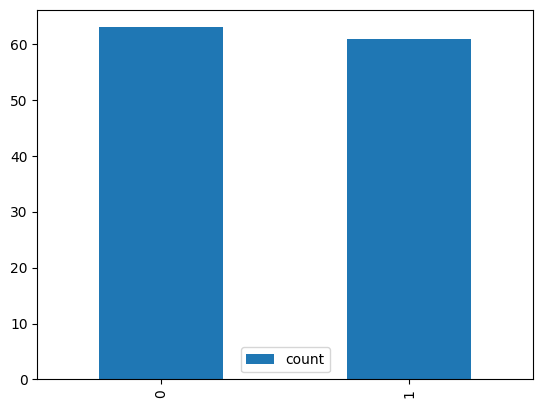

In [78]:
# Frequencey table

data = yf.download(tickers='AAPL', start='2024-01-01', end='2024-06-30')
data['Daily Returns'] = data['Close'].pct_change()
data['Categoty Daily Returns'] = data['Daily Returns'].apply(lambda x: 'Positive' if x > 0 else " Negative")
Freq = data['Categoty Daily Returns'].value_counts().reset_index()
Freq.plot(kind='bar')

<Axes: ylabel='proportion'>

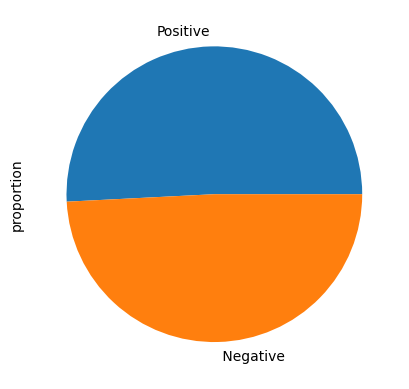

In [82]:
# Relative Frequencey 
data['Categoty Daily Returns'].value_counts(normalize=True).plot(kind='pie')

In [77]:
# Cumulative Frequencey 

data['Categoty Daily Returns'].value_counts(normalize=True).reset_index().cumsum()

,Categoty Daily Returns,proportion
0,Positive,0.508065
1,Positive Negative,1.000000


<Axes: >

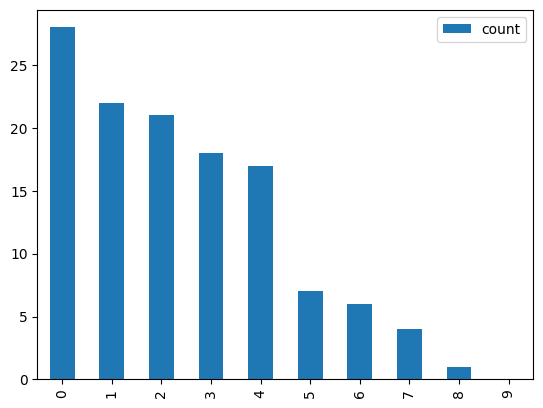

In [88]:
# Numerical Column
data['Close']

pd.cut(data['Close'],bins=10).value_counts().reset_index().plot(kind='bar')

(array([37., 14., 42., 18.,  2., 11.]),
 array([165.        , 173.61166636, 182.22333272, 190.83499908,
        199.44666545, 208.05833181, 216.66999817]),
 <BarContainer object of 6 artists>)

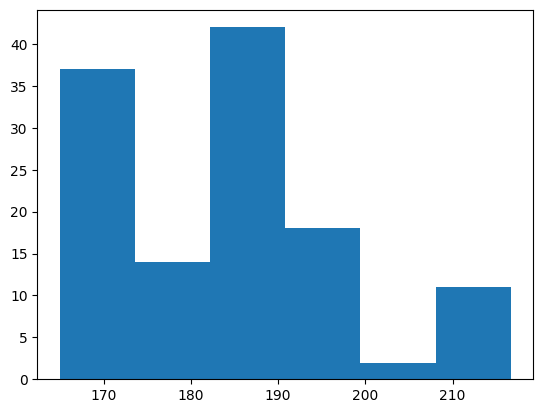

In [92]:
plt.hist(data['Close'],bins=6)

In [94]:
data

,Open,High,Low,Close,Adj Close,Volume,Daily Returns,Categoty Daily Returns
Date,,,,,,,,
2024-01-02,187.149994,188.440002,183.889999,185.639999,185.152283,82488700,NaN,Negative
2024-01-03,184.220001,185.880005,183.429993,184.250000,183.765945,58414500,-0.007488,Negative
2024-01-04,182.149994,183.089996,180.880005,181.910004,181.432098,71983600,-0.012700,Negative
2024-01-05,181.990005,182.759995,180.169998,181.179993,180.703995,62303300,-0.004013,Negative
2024-01-08,182.089996,185.600006,181.500000,185.559998,185.072495,59144500,0.024175,Positive
...,...,...,...,...,...,...,...,...
2024-06-24,207.720001,212.699997,206.589996,208.139999,208.139999,80727000,0.003133,Positive
2024-06-25,209.149994,211.380005,208.610001,209.070007,209.070007,56713900,0.004468,Positive
2024-06-26,211.500000,214.860001,210.639999,213.250000,213.250000,66213200,0.019993,Positive


In [99]:
data['Day Name'] = data.index.day_name()

In [100]:
data

,Open,High,Low,Close,Adj Close,Volume,Daily Returns,Categoty Daily Returns,Day Name
Date,,,,,,,,,
2024-01-02,187.149994,188.440002,183.889999,185.639999,185.152283,82488700,NaN,Negative,Tuesday
2024-01-03,184.220001,185.880005,183.429993,184.250000,183.765945,58414500,-0.007488,Negative,Wednesday
2024-01-04,182.149994,183.089996,180.880005,181.910004,181.432098,71983600,-0.012700,Negative,Thursday
2024-01-05,181.990005,182.759995,180.169998,181.179993,180.703995,62303300,-0.004013,Negative,Friday
2024-01-08,182.089996,185.600006,181.500000,185.559998,185.072495,59144500,0.024175,Positive,Monday
...,...,...,...,...,...,...,...,...,...
2024-06-24,207.720001,212.699997,206.589996,208.139999,208.139999,80727000,0.003133,Positive,Monday
2024-06-25,209.149994,211.380005,208.610001,209.070007,209.070007,56713900,0.004468,Positive,Tuesday
2024-06-26,211.500000,214.860001,210.639999,213.250000,213.250000,66213200,0.019993,Positive,Wednesday


In [101]:
pd.crosstab(data['Categoty Daily Returns'],data['Day Name'])

Day Name,Friday,Monday,Thursday,Tuesday,Wednesday
Categoty Daily Returns,,,,,
Negative,13,10,14,12,12
Positive,12,12,12,14,13


In [102]:
data

,Open,High,Low,Close,Adj Close,Volume,Daily Returns,Categoty Daily Returns,Day Name
Date,,,,,,,,,
2024-01-02,187.149994,188.440002,183.889999,185.639999,185.152283,82488700,NaN,Negative,Tuesday
2024-01-03,184.220001,185.880005,183.429993,184.250000,183.765945,58414500,-0.007488,Negative,Wednesday
2024-01-04,182.149994,183.089996,180.880005,181.910004,181.432098,71983600,-0.012700,Negative,Thursday
2024-01-05,181.990005,182.759995,180.169998,181.179993,180.703995,62303300,-0.004013,Negative,Friday
2024-01-08,182.089996,185.600006,181.500000,185.559998,185.072495,59144500,0.024175,Positive,Monday
...,...,...,...,...,...,...,...,...,...
2024-06-24,207.720001,212.699997,206.589996,208.139999,208.139999,80727000,0.003133,Positive,Monday
2024-06-25,209.149994,211.380005,208.610001,209.070007,209.070007,56713900,0.004468,Positive,Tuesday
2024-06-26,211.500000,214.860001,210.639999,213.250000,213.250000,66213200,0.019993,Positive,Wednesday


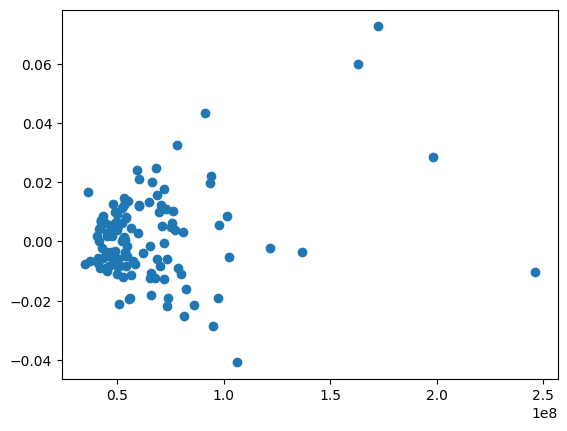

In [104]:
plt.scatter(data['Volume'],data['Daily Returns'])

<Axes: title={'center': 'Daily Returns'}, xlabel='Categoty Daily Returns'>

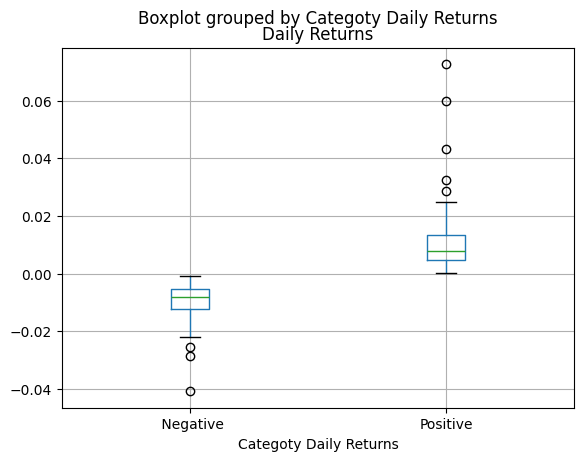

In [108]:
data.boxplot(column='Daily Returns', by='Categoty Daily Returns')


### Quantiles
Quantiles are points in your data that divide it into equal-sized intervals. They help you understand the distribution of your data by providing a way to segment it.

### Quartiles
Quartiles divide the data into four equal parts.

- **Q1 (First Quartile)**: 25% of the data falls below this point.
- **Q2 (Second Quartile/Median)**: 50% of the data falls below this point.
- **Q3 (Third Quartile)**: 75% of the data falls below this point.

**Example**:
A trader might use quartiles to analyze the distribution of daily returns of a stock to understand the range within which the majority of returns lie.

```python
import numpy as np
import pandas as pd

# Example data: Daily returns of a stock
data = np.random.normal(0, 1, 100)  # Generating 100 random daily returns
df = pd.DataFrame(data, columns=['Daily Returns'])

# Calculating quartiles
Q1 = df['Daily Returns'].quantile(0.25)
Q2 = df['Daily Returns'].quantile(0.50)
Q3 = df['Daily Returns'].quantile(0.75)

print(f"Q1: {Q1}, Q2 (Median): {Q2}, Q3: {Q3}")
```

### Deciles
Deciles divide the data into ten equal parts.

- **D1**: 10% of the data falls below this point.
- **D2**: 20% of the data falls below this point.
- ... and so on up to **D9**.

**Example**:
A trader might use deciles to categorize the performance of different stocks in a portfolio and identify the top 10% and bottom 10% performers.

```python
# Calculating deciles
deciles = [df['Daily Returns'].quantile(i/10) for i in range(1, 10)]
print("Deciles:", deciles)
```

### Percentiles
Percentiles divide the data into 100 equal parts.

- **P1**: 1% of the data falls below this point.
- **P2**: 2% of the data falls below this point.
- ... and so on up to **P99**.

**Example**:
Percentiles can be used to identify outliers in trading returns. For example, a trader might look at the 1st percentile and the 99th percentile to see the extreme returns.

```python
# Calculating percentiles
percentiles = [df['Daily Returns'].quantile(i/100) for i in range(1, 100)]
print("Percentiles:", percentiles[:10])  # Displaying the first 10 percentiles
```

### Quintiles
Quintiles divide the data into five equal parts.

- **Q1**: 20% of the data falls below this point.
- **Q2**: 40% of the data falls below this point.
- ... and so on up to **Q4**.

**Example**:
Quintiles can be used to categorize stocks based on performance. For example, dividing a portfolio into five groups from the lowest 20% to the highest 20%.

```python
# Calculating quintiles
quintiles = [df['Daily Returns'].quantile(i/5) for i in range(1, 5)]
print("Quintiles:", quintiles)
```




### Summary

1. **Quartiles**: Used to analyze the distribution of daily returns to understand the range within which the majority of returns lie.
2. **Deciles**: Used to categorize the performance of different stocks and identify top and bottom performers.
3. **Percentiles**: Used to identify outliers in trading returns and see extreme returns.
4. **Quintiles**: Used to categorize stocks based on performance, dividing a portfolio into five groups from the lowest to the highest performers.


In [109]:
per  = pd.Series([5,50,60,70,85,135,160,170,180,1000])

In [111]:
per.describe()

np.percentile(per,[0,25,50,75,100])

array([   5. ,   62.5,  110. ,  167.5, 1000. ])

{'whiskers': [<matplotlib.lines.Line2D at 0x121827950>,
 'caps': [<matplotlib.lines.Line2D at 0x121826660>,
 'boxes': [<matplotlib.lines.Line2D at 0x11f3a1fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x121824560>],
 'fliers': [<matplotlib.lines.Line2D at 0x121825220>],
 'means': []}

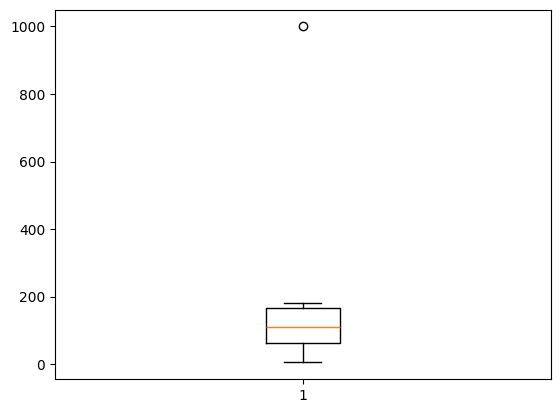

In [112]:
plt.boxplot(per)

In [119]:
ser = [ 1, 2, 1, 3, 4, 5, 3, 50, -40, 2]
serie = pd.Series(ser)
ser.sort()
ser

[-40, 1, 1, 2, 2, 3, 3, 4, 5, 50]

In [116]:
serie.describe()

count    10.000000
mean      3.100000
std      21.273092
min     -40.000000
25%       1.250000
50%       2.500000
75%       3.750000
max      50.000000
dtype: float64

In [120]:
demo_box = pd.Series([1, 2, 1, 3, 4, 5, 3, 50, -40, 2])
demo_box

0     1
1     2
2     1
3     3
4     4
5     5
6     3
7    50
8   -40
9     2
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x121a52390>,
 'caps': [<matplotlib.lines.Line2D at 0x121a527b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x121a521e0>],
 'medians': [<matplotlib.lines.Line2D at 0x121a52d50>],
 'fliers': [<matplotlib.lines.Line2D at 0x121a52ff0>],
 'means': []}

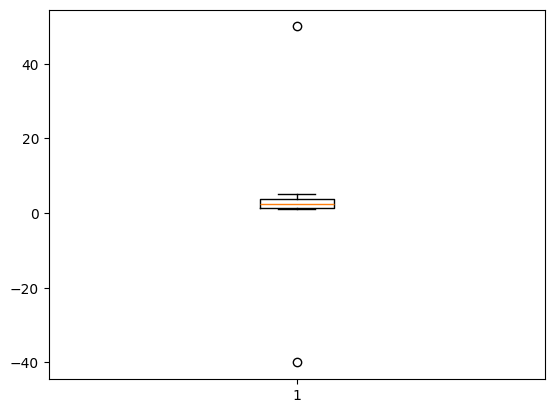

In [121]:
plt.boxplot(demo_box)

In [122]:
demo_box.describe()

count    10.000000
mean      3.100000
std      21.273092
min     -40.000000
25%       1.250000
50%       2.500000
75%       3.750000
max      50.000000
dtype: float64